In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [3]:
# Wrngle function 
def wrangle(filepath):
    # import the dataframe and store in the variable df
    df = pd.read_csv(filepath)

    # calculate the total number of bathrooms and save to a new column
    df["Total_baths"] = df["BsmtFullBath"] + df["FullBath"] + df["BsmtHalfBath"] + df["HalfBath"]
    
    # remove outliers from the target vector
    low, high= df["LotArea"].quantile([0.1, 0.9])
    mask_area = df["LotArea"].between(low, high)
    df= df[mask_area]

    # drop columns with null values above 50%
    df.drop(columns= ["Alley", "MasVnrType", "PoolQC", "Fence", "MiscFeature"],
           inplace=True)

    # drop high and low cardinality columns or categorical columns
    mask_cat = df.select_dtypes("object")
    df.drop(columns= mask_cat, inplace=True)

    # drop other irrelevant columns that might affect or leaky columns
    df.drop(columns=["BsmtFullBath", "FullBath", "HalfBath", "BsmtHalfBath"], inplace=True)
    
    return df

     
    

In [4]:
df = wrangle("train.csv")
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Total_baths
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,61,0,0,0,0,0,2,2008,208500,4
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,0,0,5,2007,181500,3
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,42,0,0,0,0,0,9,2008,223500,4
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,35,272,0,0,0,0,2,2006,140000,2
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,84,0,0,0,0,0,12,2008,250000,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1172 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1172 non-null   int64  
 1   MSSubClass     1172 non-null   int64  
 2   LotFrontage    984 non-null    float64
 3   LotArea        1172 non-null   int64  
 4   OverallQual    1172 non-null   int64  
 5   OverallCond    1172 non-null   int64  
 6   YearBuilt      1172 non-null   int64  
 7   YearRemodAdd   1172 non-null   int64  
 8   MasVnrArea     1166 non-null   float64
 9   BsmtFinSF1     1172 non-null   int64  
 10  BsmtFinSF2     1172 non-null   int64  
 11  BsmtUnfSF      1172 non-null   int64  
 12  TotalBsmtSF    1172 non-null   int64  
 13  1stFlrSF       1172 non-null   int64  
 14  2ndFlrSF       1172 non-null   int64  
 15  LowQualFinSF   1172 non-null   int64  
 16  GrLivArea      1172 non-null   int64  
 17  BedroomAbvGr   1172 non-null   int64  
 18  KitchenAbvGr 

In [6]:
df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice',
       'Total_baths'],
      dtype='object')

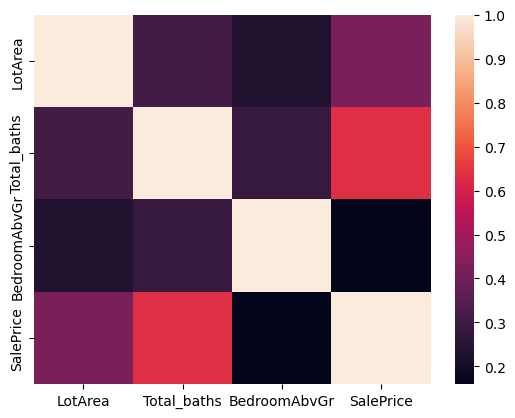

In [7]:
corr = df[["LotArea", "Total_baths", "BedroomAbvGr", "SalePrice"]].corr()
sns.heatmap(corr);

Text(0.5, 1.0, 'Distribution of Apartment Prices')

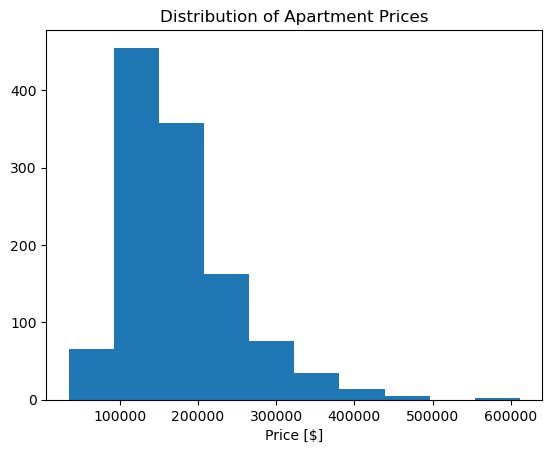

In [8]:
# Build histogram
plt.hist(df["SalePrice"])
# Label axes
plt.xlabel("Price [$]")
# Add title
plt.title("Distribution of Apartment Prices")

Text(0.5, 1.0, 'Apartment Prices vs. Area')

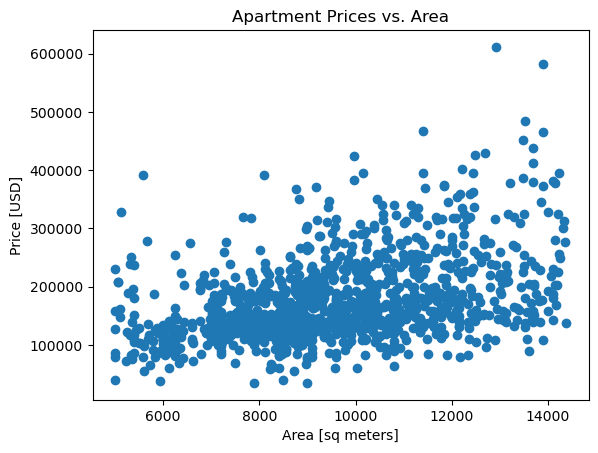

In [9]:
plt.scatter(x=df["LotArea"], y=df["SalePrice"])
# Label axes
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
# Add title
plt.title("Apartment Prices vs. Area")

In [10]:
"""Split the dataframe into feature matrix and target vector"""

features = ["LotArea","Total_baths", "BedroomAbvGr"]
target = "SalePrice"
X_train = df[features]
y_train = df[target]

In [11]:
#  Build model

"""baseline model"""
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(df)
baseline_mae = mean_absolute_error(y_train, y_pred_baseline)

print("Mean Apt price:", round(y_mean, 2))
print("Baseline MAE:", round(baseline_mae, 2))

Mean Apt price: 176632.41
Baseline MAE: 53961.51


In [13]:
# Using the Mean Absolute Percentaage Error - a good model should have <10%
train_mape = np.mean(np.abs((y_mean - y_pred_baseline) / y_mean)) * 100
print("Mean Absolute Percentage Error (MAPE):", train_mape)

Mean Absolute Percentage Error (MAPE): 0.0


In [15]:
"""insantiate linear regression model"""
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
model = make_pipeline(
    SimpleImputer(),
    LinearRegression()
)

# Fit model
model.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('linearregression', LinearRegression())])

In [17]:
"""Predict the train data and evaluate model performance"""
y_pred_training = model.predict(X_train)
y_pred_training[:5]



array([239431.92731642, 204665.05005893, 263477.40836626, 159592.96663722,
       283559.38875767])

In [19]:
"""evaluating the train set"""
#Calculate our training mean absolute error for our predictions in y_pred_training as compared to the true targets in y_train
mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 38420.07


In [21]:
"""import the test set into a dataframe using the wrangle function"""
X_test = pd.read_csv("test.csv")
print(X_test.info())
X_test.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [23]:
test_dt = wrangle("test.csv")

In [25]:
features = ["LotArea","Total_baths", "BedroomAbvGr"]
test_dt = test_dt[features]
test_pred = pd.Series(model.predict(test_dt))
test_pred.head()

0    138510.834520
1    240990.901788
2    207911.190001
3    126328.910027
4    208100.118780
dtype: float64

In [ ]:
"""Notice that the test dataset has a NaN value which will affect the 
evaluation of the model perfprmance on the test set thus the null value 
will be filled with a random value to evaluate the model performance on the test dataset"""

In [59]:
test_dt.head()

,LotArea,Total_baths,BedroomAbvGr
0,11622,1.0,2
2,13830,3.0,3
3,9978,3.0,3
4,5005,2.0,2
5,10000,3.0,3


In [31]:
# Fill all NaNs in the 'Total_baths' column with a specific value, e.g., 2
test_dt['Total_baths'].fillna(2, inplace=True)

In [69]:
"""evaluating the test set"""
# Select the first column of test_dt (replace 0 with the desired column index or column name)
mae_test = mean_absolute_error(test_dt.iloc[:, 0], test_pred)  
print("Test MAE for the first output:", round(mae_test, 2))

"""The MAE is lower than the mean apartment price which is a good indicator that the 
model performed excellent"""

Test MAE for the first output: 167030.43


'The MAE is lower than the mean apartment price which is a good indicator that the \nmodel performed excellent'

In [35]:
test_dt.isnull().sum()

LotArea         0
Total_baths     0
BedroomAbvGr    0
dtype: int64

In [71]:
# Identify a single column with a missing value
print(test_dt.loc[test_dt['Total_baths'].isna()])

Empty DataFrame
Columns: [LotArea, Total_baths, BedroomAbvGr]
Index: []


In [73]:
# Creating a DataFrame with 'id' and 'test_pred'
predictions_df = pd.DataFrame({
    'Id': X_test['Id'],
    'SalePrice': round(test_pred, 3)
})
predictions_df.head()

,Id,SalePrice
0,1461,138510.835
1,1462,240990.902
2,1463,207911.190
3,1464,126328.910
4,1465,208100.119


In [45]:
predictions_df.to_csv('Predictions.csv', index=False)

In [75]:
test_mape = np.mean(np.abs((X_test - test_pred) / X_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", test_mape)

Mean Absolute Percentage Error (MAPE): nan


In [85]:
import pickle
# Saving the DataFrame to a pickle file
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)